<a href="https://colab.research.google.com/github/ananyagrwl/Farm_expert_ML_model/blob/main/Farm_Expert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,f1_score

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [ ]:
df=pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.count()

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [ ]:
df['label'].value_counts().count()

22

In [ ]:

df.isnull().values.any() # False means no Nan

False

In [ ]:
df["N"].isna().sum()

0

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
le=LabelEncoder()

In [ ]:
# df['label']= le.fit_transform(df['label'])
df.label = le.fit_transform(df.label)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
df.label.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Crop Prediction: Input soil condition and output crop with soil
X=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
Y=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100))

In [ ]:
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor())

In [ ]:
soil_prediction = model.predict(X_test)
model.predict([[90,42,43,20,82,6,202]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

array([[ 90.        ,  42.        ,  43.        ,  19.97993009,
         81.99625215,   5.99984419, 202.07619985,  19.88      ]])

In [ ]:
# Soil Prediction: Input crop name with soil and output suitable crop with soil
X=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']]
Y=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model2 = MultiOutputRegressor(RandomForestRegressor(n_estimators=100))
model2.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor())

In [ ]:
crop_prediction = model2.predict(X_test)
model2.predict([[90,42,43,20,82,6,202,20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

array([[ 90.        ,  42.        ,  43.        ,  19.97180029,
         81.99415764,   6.00025325, 202.3527386 ,  20.        ]])

In [ ]:
model2.score(X,Y)

0.999986750210409

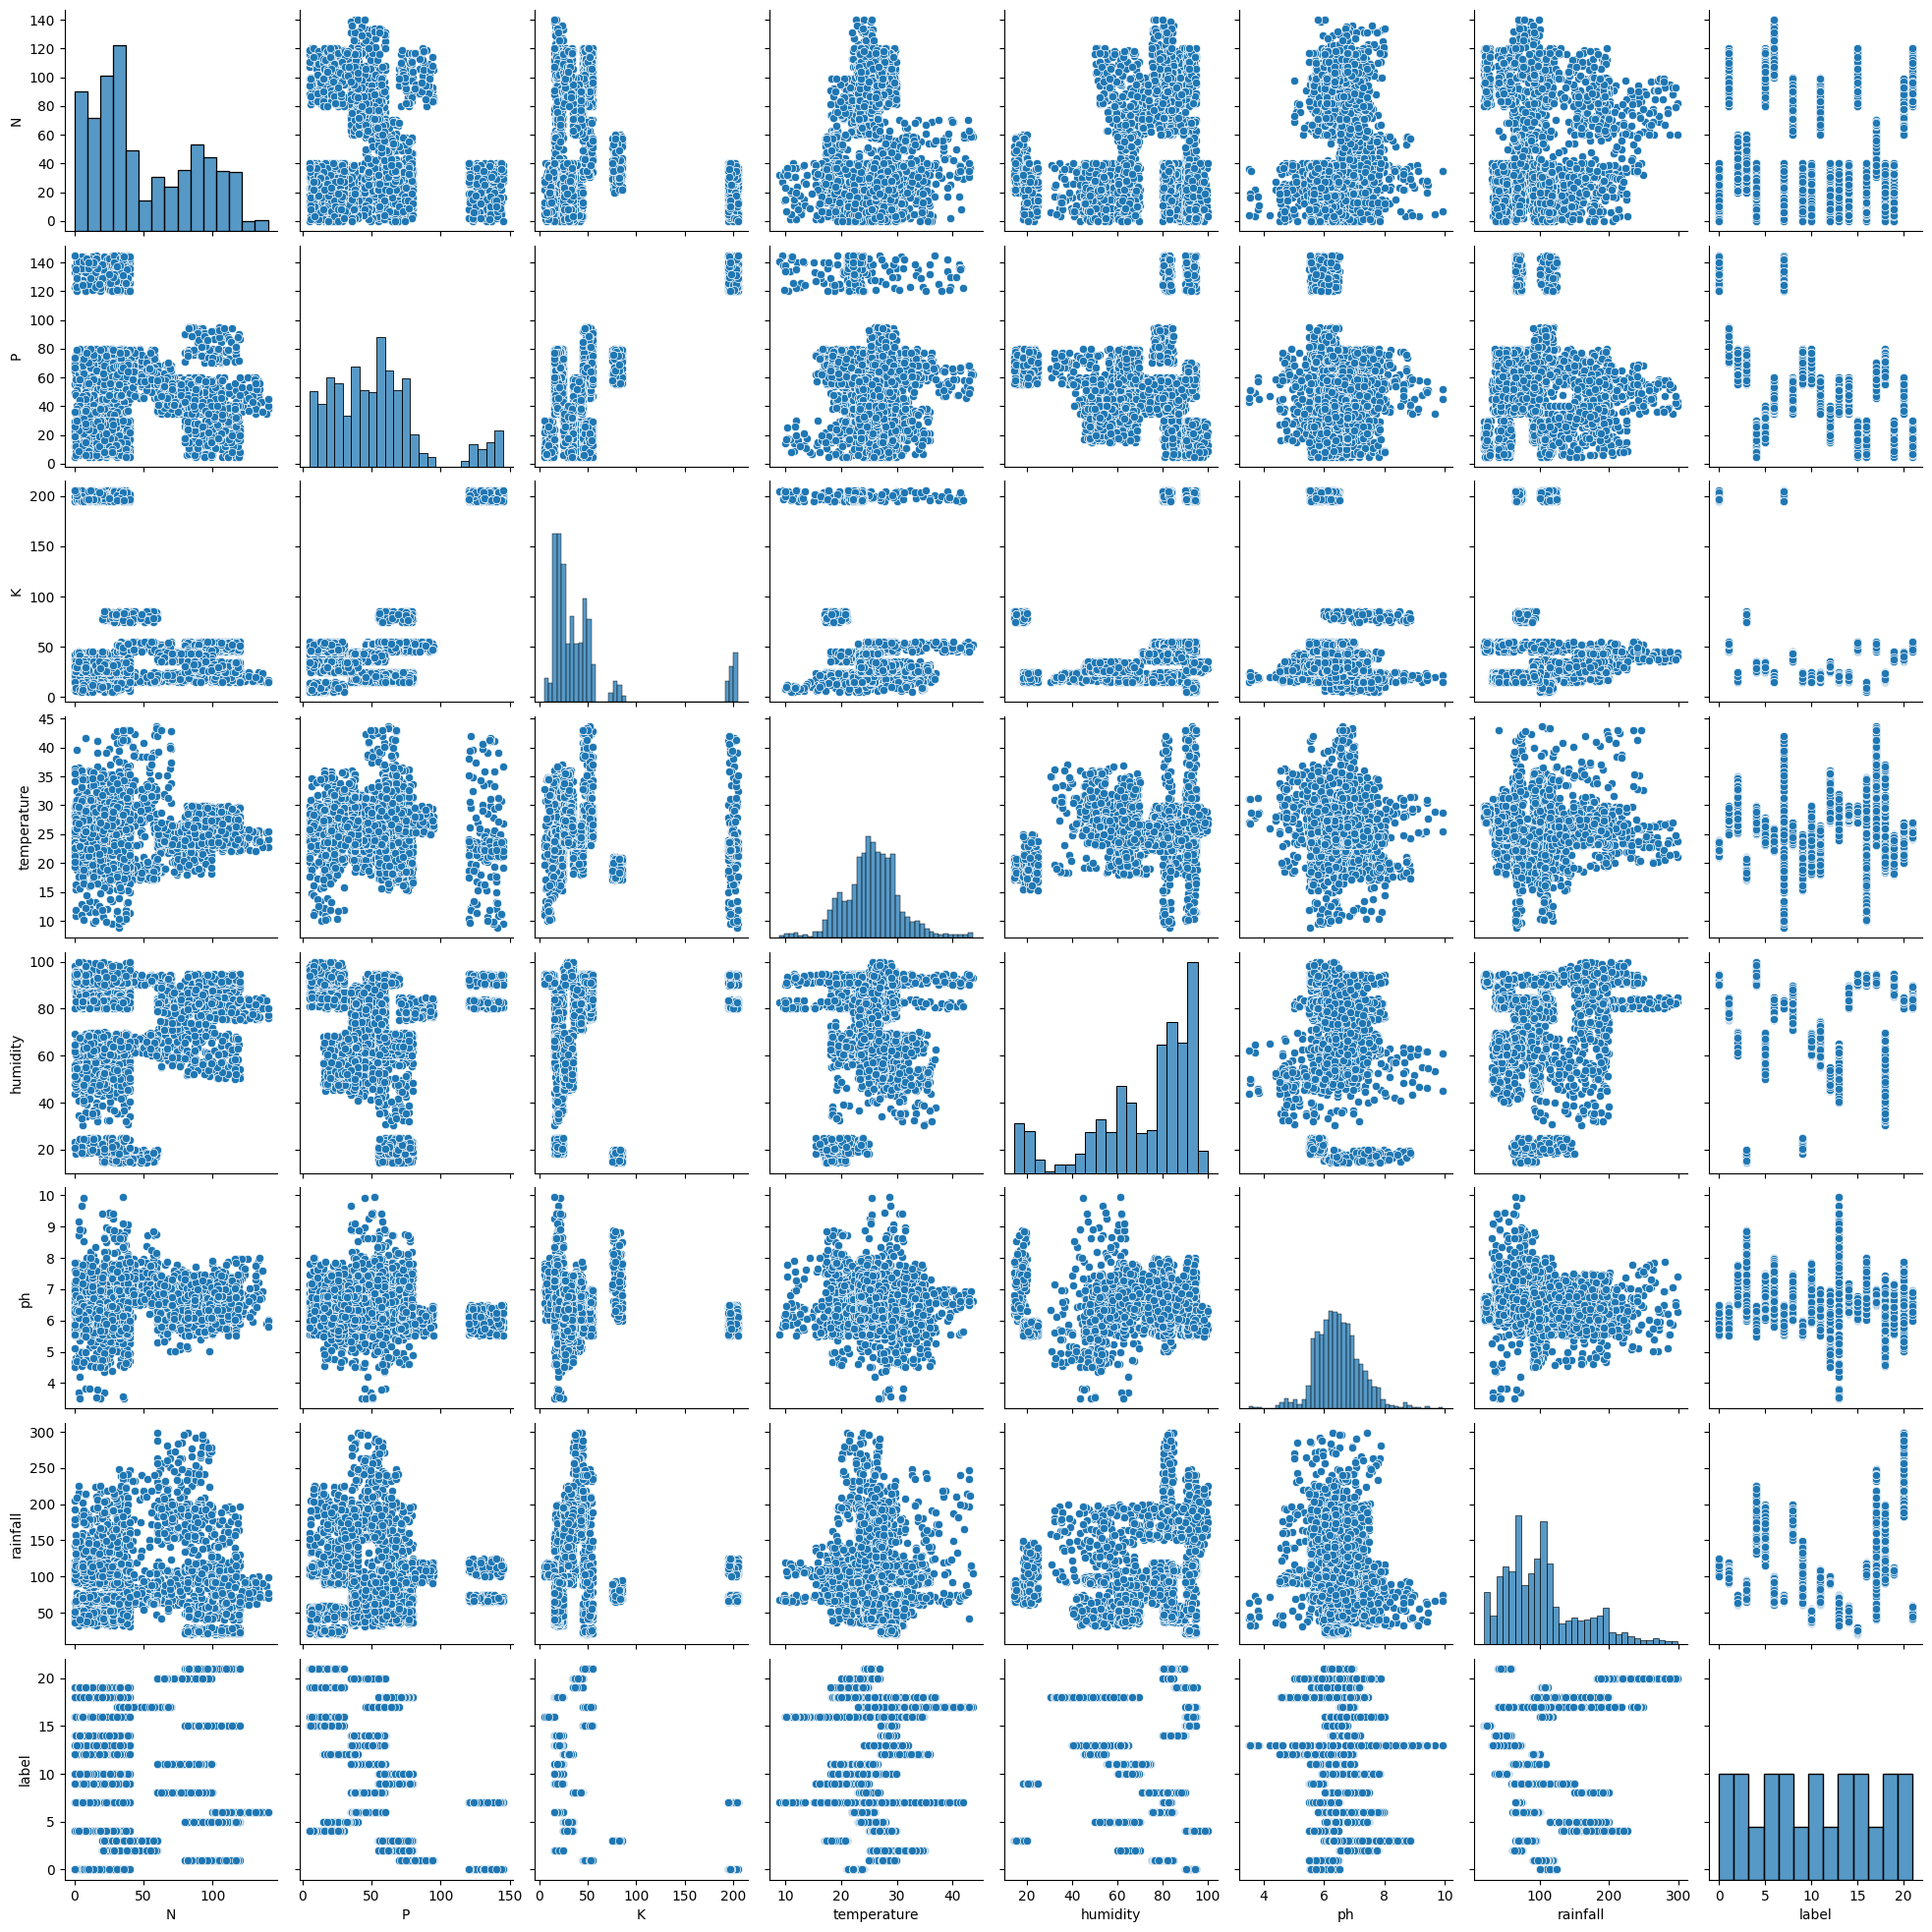

In [ ]:
sn.pairplot(data=df)

In [3]:
models_dict = {'cropM': model, 'soil': model2}
import pickle
with open('Farm_expert_model.pickle', 'wb') as f:
    pickle.dump(models_dict, f)

NameError: name 'model' is not defined

In [ ]:
import json

columns = {
    'data_columns': [col for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [ ]:
# to get list the contents of the current directory
!ls

columns.json  Crop_recommendation.csv  Farm_expert_model.pickle  sample_data


In [ ]:
files.download('/content/Farm_expert_model.pickle')
# files.download('columns.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>